In [1]:
import pandas as pd
import plotnine as p9
from palmerpenguins import load_penguins
from plotnine import *

url="https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2023/2023-03-21/languages.csv"
df = pd.read_csv(url)
df

,pldb_id,title,description,type,appeared,creators,website,domain_name,domain_name_registered,reference,...,features_has_semantic_indentation,features_has_line_comments,line_comment_token,last_activity,number_of_users,number_of_jobs,origin_community,central_package_repository_count,file_type,is_open_source
0,java,Java,NaN,pl,1995,James Gosling,https://oracle.com/java/,NaN,NaN,NaN,...,False,True,//,2022,5550123,85206,Sun Microsystems,NaN,text,NaN
1,javascript,JavaScript,NaN,pl,1995,Brendan Eich,NaN,NaN,NaN,https://www.w3schools.com/js/js_reserved.asp,...,False,True,//,2022,5962666,63993,Netscape,NaN,text,NaN
2,c,C,NaN,pl,1972,Dennis Ritchie,NaN,NaN,NaN,http://www.c4learn.com/c-programming/c-keywords/,...,False,True,//,2022,3793768,59919,Bell Labs,0.0,text,NaN
3,python,Python,NaN,pl,1991,Guido van Rossum,https://www.python.org/,python.org,1995.0,https://www.programiz.com/python-programming/k...,...,True,True,#,2022,2818037,46976,Centrum Wiskunde & Informatica,NaN,text,NaN
4,sql,SQL,NaN,queryLanguage,1974,Donald D. Chamberlin and Raymond F. Boyce,NaN,NaN,NaN,NaN,...,False,True,--,2022,7179119,219617,IBM,0.0,text,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4298,vtl,Very Tiny Language,VTL-2 is the second Very Tiny Language develop...,pl,1976,Garry Shannon and Frank McCoy,NaN,NaN,NaN,http://www.altair680kit.com/manuals/Altair_680...,...,NaN,NaN,NaN,1976,0,0,NaN,0.0,NaN,NaN
4299,wizml,wizml,WIZML is a sublanguage of VTML. It is a tag-ba...,pl,1997,NaN,NaN,NaN,NaN,https://sites.hks.harvard.edu/research/Macrome...,...,NaN,NaN,NaN,1997,0,0,NaN,0.0,NaN,NaN
4300,wolontis-bell-interpreter,Wolontis-Bell Interpreter,NaN,pl,1955,NaN,NaN,NaN,NaN,https://semanticscholar.org/paper/8258aed6f523...,...,NaN,NaN,NaN,1955,0,0,NaN,0.0,NaN,NaN
4301,xl,xl,NaN,pl,1977,NaN,NaN,NaN,NaN,https://semanticscholar.org/paper/36672d537f35...,...,NaN,NaN,NaN,1977,0,0,NaN,0.0,NaN,NaN


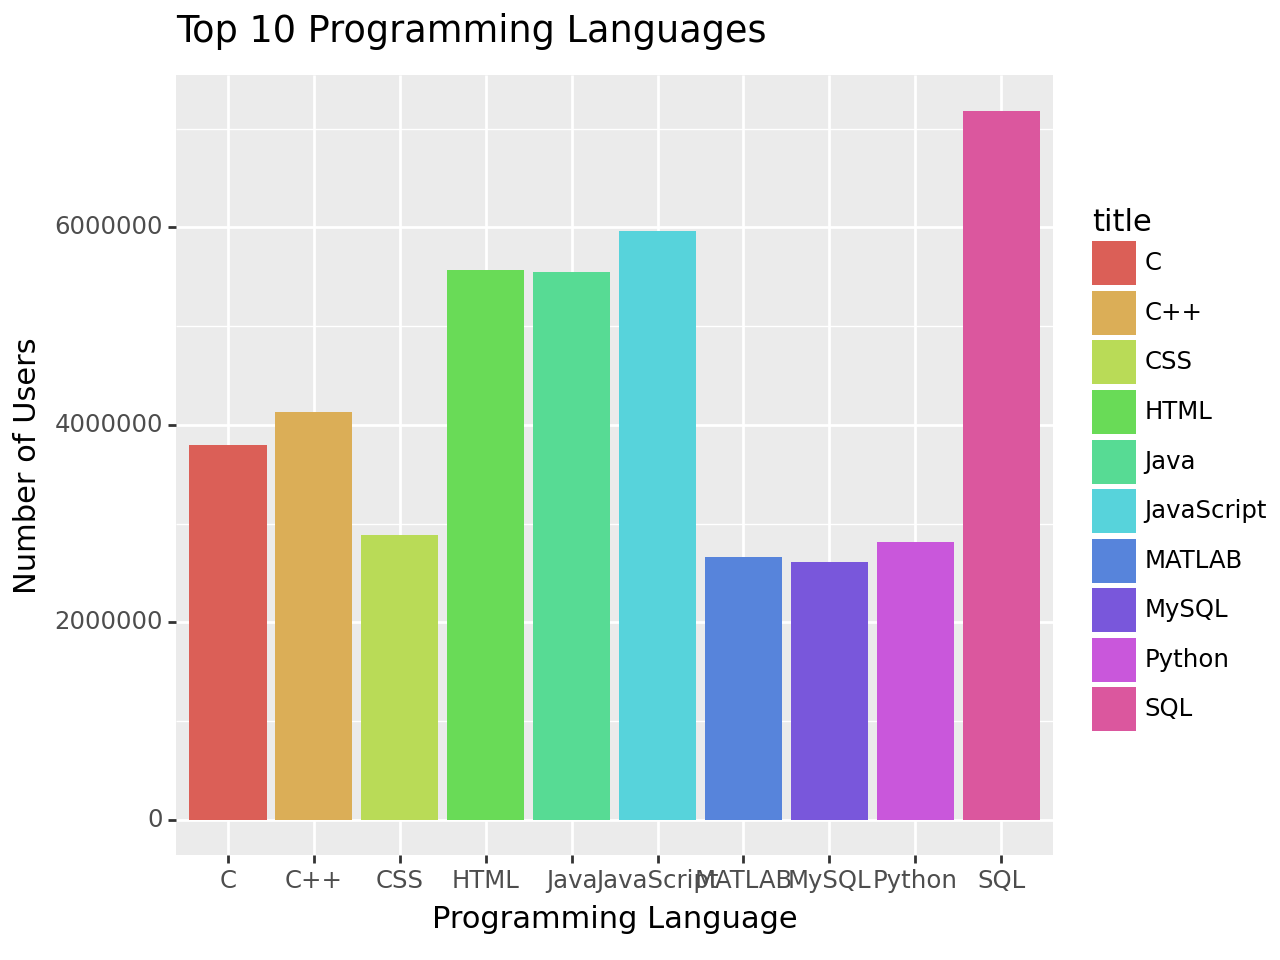

In [2]:
from plotnine import ggplot, aes, geom_bar, labs
import pandas as pd

# Assuming you have the DataFrame named 'df' with the relevant columns
url="https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2023/2023-03-21/languages.csv"
df = pd.read_csv(url)
#df
# Filter out rows with NaN values in 'number_of_users' column
df = df.dropna(subset=['number_of_users'])

# Sort the DataFrame by 'number_of_users' in descending order
df = df.sort_values(by='number_of_users', ascending=False)

# Keep the top 10 programming languages
top_languages = df.head(10)
aggregated_data = top_languages.copy()

# Create a bar plot using plotnine
plot = (
    ggplot(aggregated_data, aes(x='title', y='number_of_users', fill='title')) +
    geom_bar(stat='identity') +
    labs(title='Top 10 Programming Languages', x='Programming Language', y='Number of Users')
)

# Show the plot
print(plot)


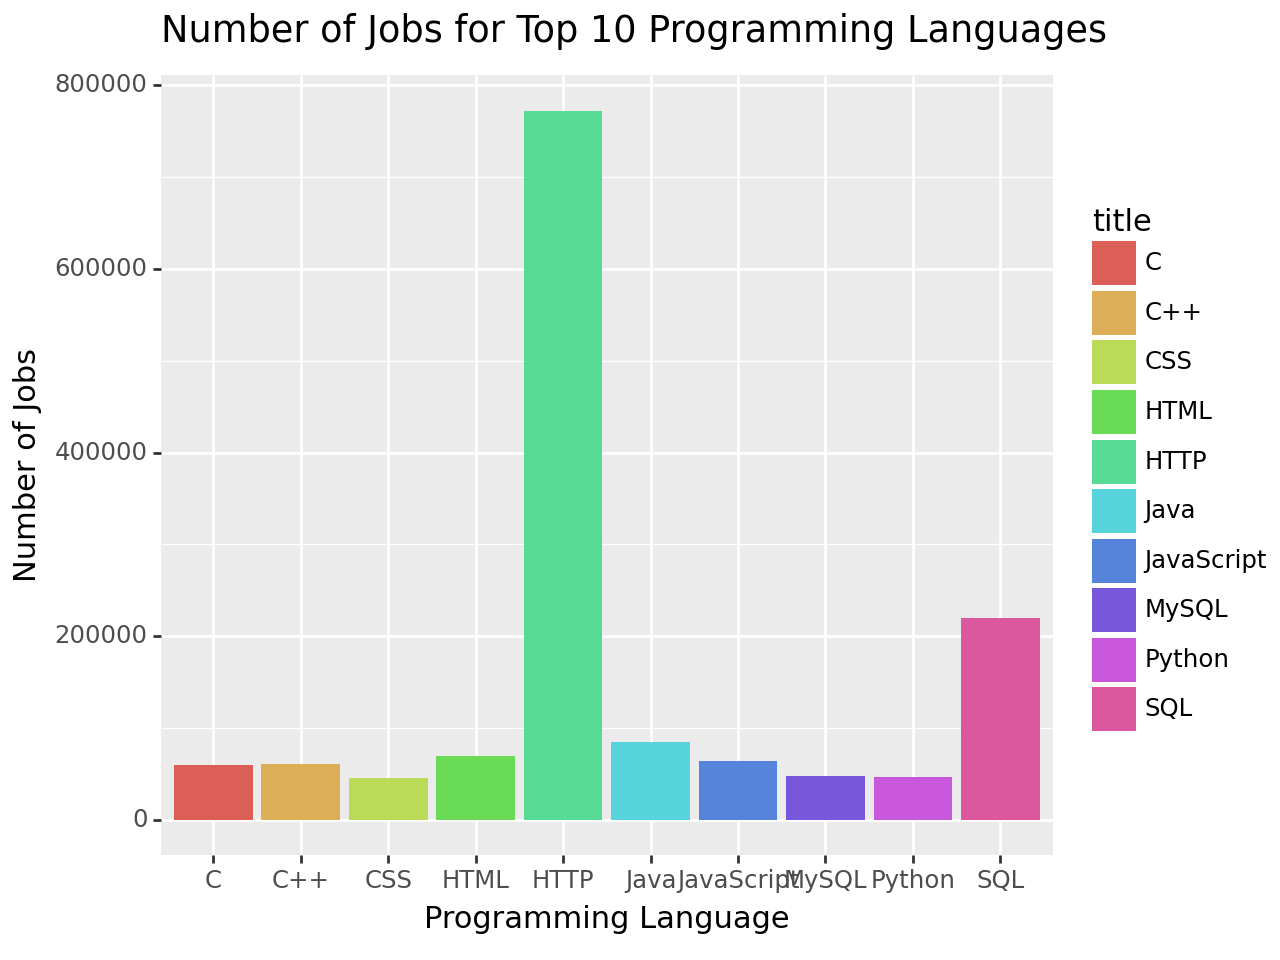

In [10]:
from plotnine import ggplot, aes, geom_bar, labs
import pandas as pd

url="https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2023/2023-03-21/languages.csv"
df = pd.read_csv(url)
# Assuming you have the DataFrame named 'df' with the relevant columns

# Filter out rows with NaN values in 'number_of_jobs' column
df = df.dropna(subset=['number_of_jobs'])


# Sort the DataFrame by 'number_of_jobs' in descending order
df = df.sort_values(by='number_of_jobs', ascending=False)

# Keep the top 10 programming languages
top_languages = df.head(10)
aggregated_data = top_languages.copy()

# Create a bar plot using plotnine
plot = (
    ggplot(aggregated_data, aes(x='title', y='number_of_jobs', fill='title')) +
    geom_bar(stat='identity') +
    labs(title='Number of Jobs for Top 10 Programming Languages', x='Programming Language', y='Number of Jobs')
)

# Show the plot
print(plot)


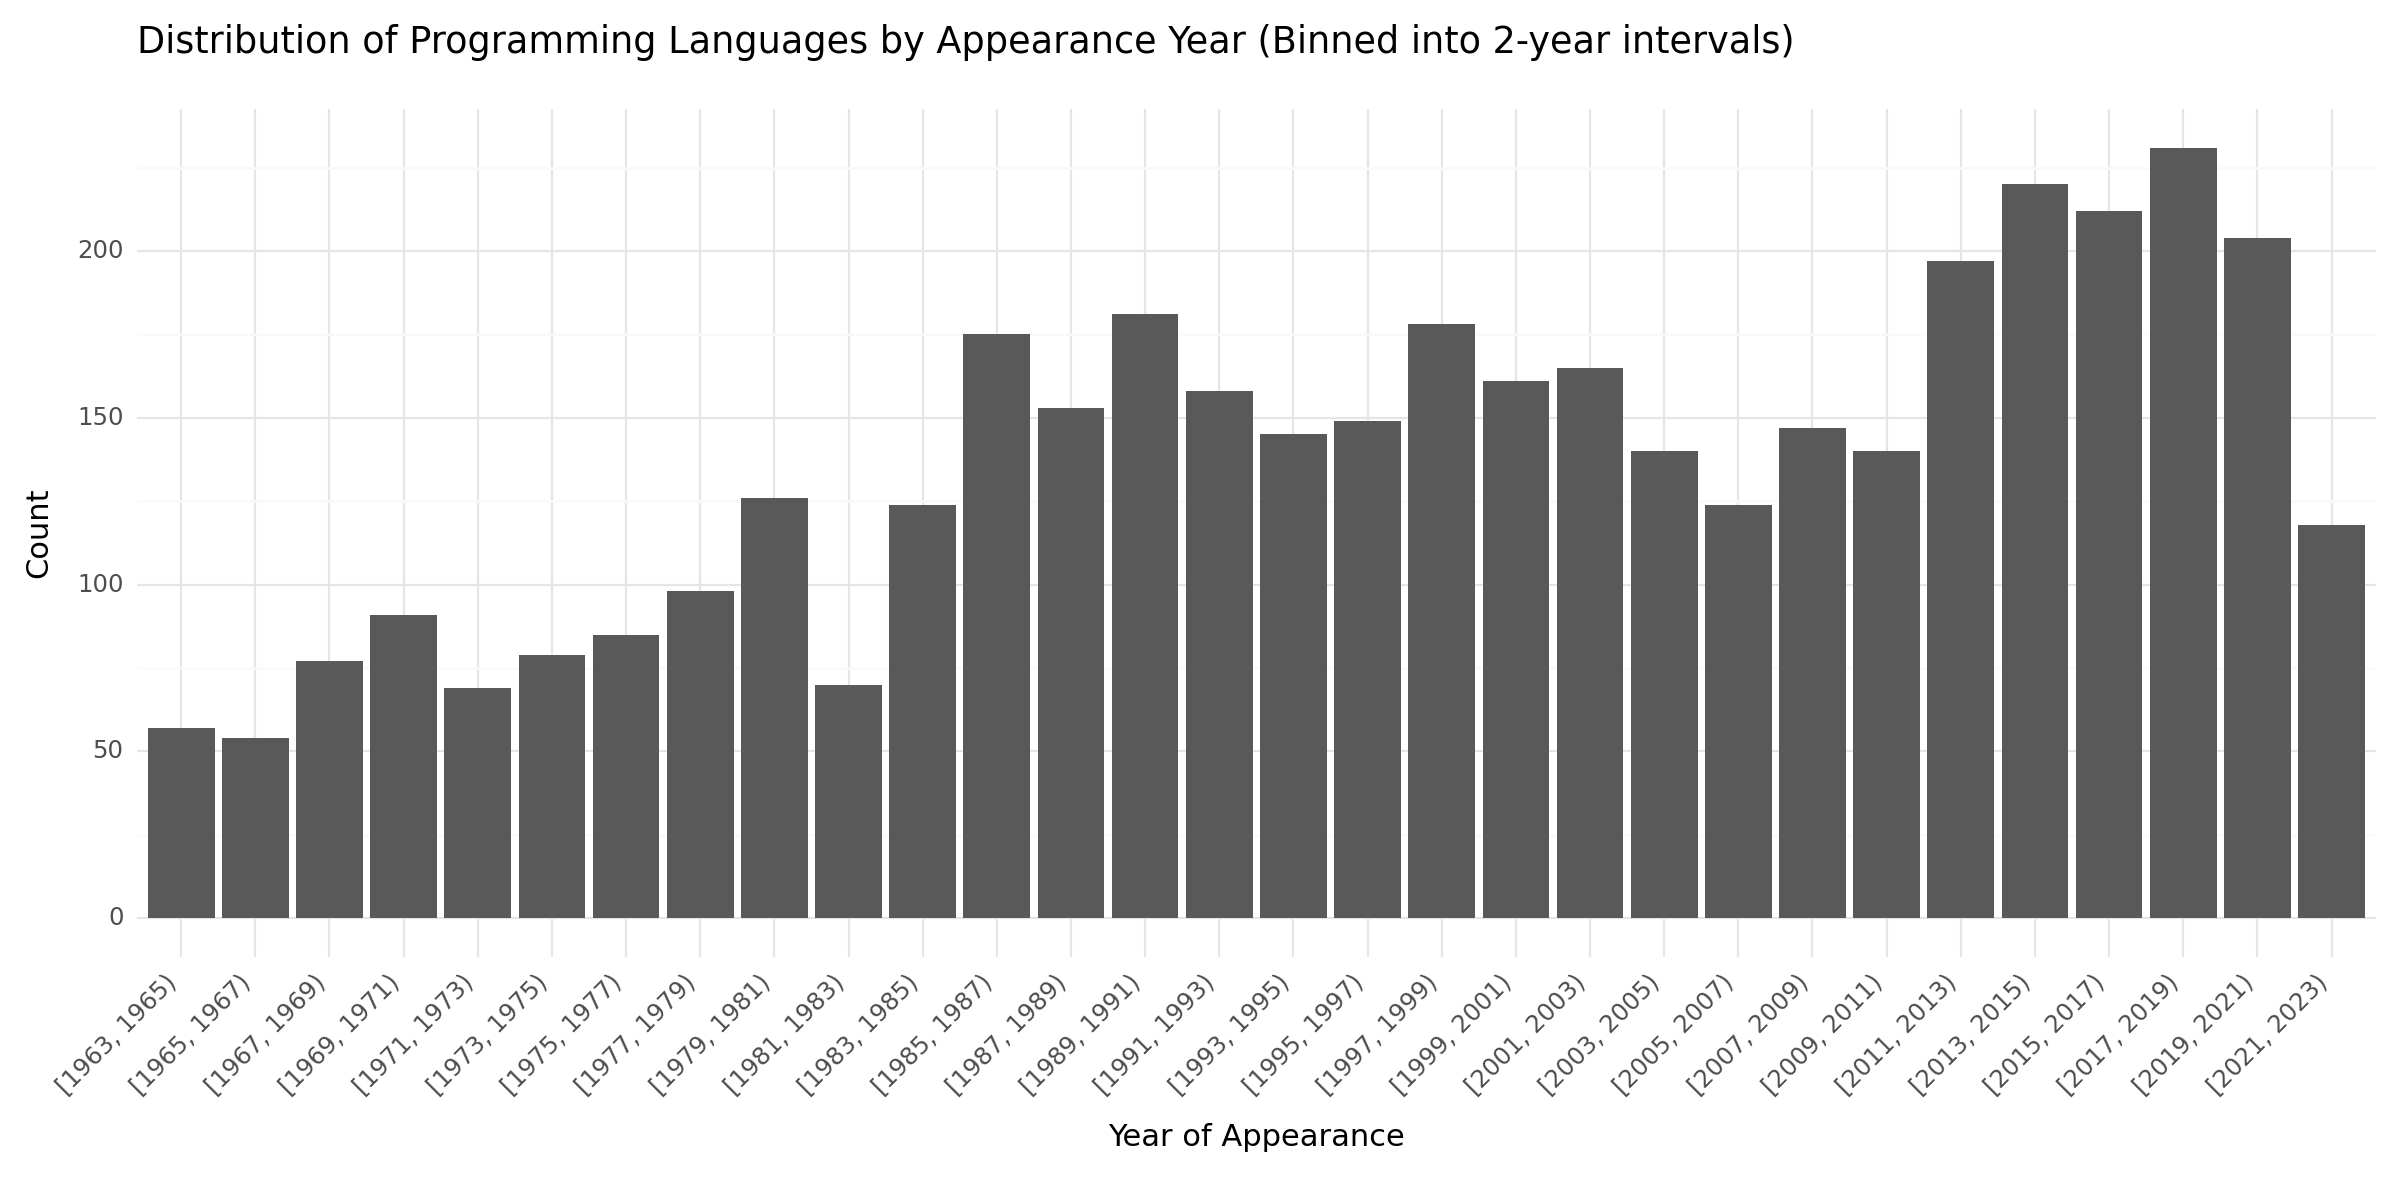

In [19]:
import pandas as pd
from plotnine import ggplot, aes, geom_bar, labs, theme_minimal, theme, element_text

# Assuming you have the DataFrame named 'df' with the relevant columns

# Filter out rows with NaN values in 'appeared' column
df = df.dropna(subset=['appeared'])

# Convert 'appeared' to integer for plotting
df['appeared'] = df['appeared'].astype(int)

# Create bins for the 'appeared' column
bins = range(df['appeared'].min(), df['appeared'].max() + 2, 2)
df['appeared_bin'] = pd.cut(df['appeared'], bins=bins, right=False, include_lowest=True)

# Create a bar chart using plotnine with angled x-axis labels, increased space, and widened x-axis
plot = (
    ggplot(df, aes(x='factor(appeared_bin)')) +
    geom_bar(stat='count') +
    labs(title='Distribution of Programming Languages by Appearance Year (Binned into 2-year intervals)',
         x='Year of Appearance', y='Count') +
    theme_minimal() +
    theme(axis_text_x=element_text(angle=45, hjust=1, margin={'b': 15}),
          figure_size=(12, 6))  # Adjust the figure size as needed
)

# Show the plot
print(plot)
